In [1]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline

In [2]:
news= pd.read_csv("train.csv")
print(news.head())

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [3]:
conversion_dict = {0:'Real', 1:'Fake'}
news['label'] = news['label'].replace(conversion_dict)
news

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Fake
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,Real
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Fake
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Fake
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Fake
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,Real
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,Real
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,Real
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",Fake


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
x=news['title']
y=news['label']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)
x_train

18751    Krauthammer: No Question Obama Left Behind ’La...
13847    Employees Sue Four More Universities Over Reti...
20028    White House Petition To Remove ‘Soros-Owned Vo...
9874     United States Criticizes Israel Over West Bank...
609      More Than ’Chaos’: Terror Ties Make Venezuela ...
                               ...                        
919       How White Cops Interact with Blacks in Real Life
20691    That’s Not the Burglar Growling. It’s His Stom...
5699     Illegal Immigrant Family Shocked at Immigratio...
10742    Court Upholds Doping-Related Ban on Russia at ...
16921    Greenpeace Links Beijing’s Air Pollution Surge...
Name: title, Length: 16640, dtype: object

In [7]:
y_train

18751    Real
13847    Real
20028    Fake
9874     Real
609      Real
         ... 
919      Fake
20691    Real
5699     Real
10742    Real
16921    Real
Name: label, Length: 16640, dtype: object

In [8]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train= tfvect.fit_transform(x_train.values.astype('U'))
tfid_x_test= tfvect.transform(x_test.values.astype('U'))

In [9]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [10]:
y_pred= classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.32%


In [11]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [12]:
fake_news_det('Use the Interactive Window to develop Python Scripts')

['Real']


Fake    10413
Real    10387
Name: label, dtype: int64


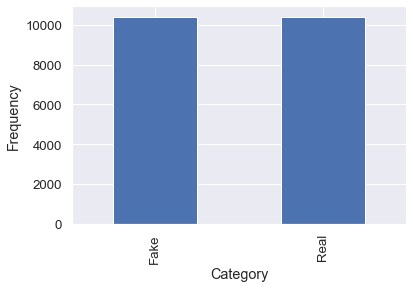

In [13]:
print(news['label'].value_counts())
news['label'].value_counts().plot.bar()
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [14]:
fake_news_det('Use the Interactive Window to develop Python Scripts')

['Real']
